In [47]:
#pip install nltk

In [48]:
#pip install spacy

In [49]:
#import libraries
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, norm, poisson
from sklearn.metrics import roc_auc_score, roc_curve

[nltk_data] Downloading package punkt to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Josiah
[nltk_data]     Lee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
data = pd.DataFrame(pd.read_csv('../Twitter Sentiment/cleanedNspelt.csv'))

def helper(string):
    temp = []
    for word in string[1:-1].split(','):
        word = word.strip()
        word = word[1:-1]
        if word:
          temp.append(word)  
    return temp
data.filtered_tokens = data.filtered_tokens.apply(helper)

Use if machine is not very strong

In [51]:
#data = data.iloc[25000:75000]
data.shape

(100000, 9)

In [52]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(data.filtered_tokens, data.labels, stratify = data.labels, test_size=0.2, random_state=42)

In [53]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
sentences = [' '.join(words) for words in X_train]

# Fit and transform the sentences
one_hot_encoded = vectorizer.fit_transform(sentences)

In [54]:
test = SelectKBest(score_func=chi2, k=20000)
X_train_new = test.fit_transform(one_hot_encoded, y_train)

In [55]:
clf = sklearn.linear_model.LogisticRegression(random_state = 42, max_iter=1000, penalty = 'l2', C = 1, solver = 'saga')
clf.fit(X_train_new, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga')

In [56]:
sen = [' '.join(words) for words in X_test]
X_test_new = vectorizer.transform(sen)
X_test_new = test.transform(X_test_new)
y_pred = clf.predict(X_test_new)

In [57]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7586
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     10000
           1       0.74      0.79      0.77     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



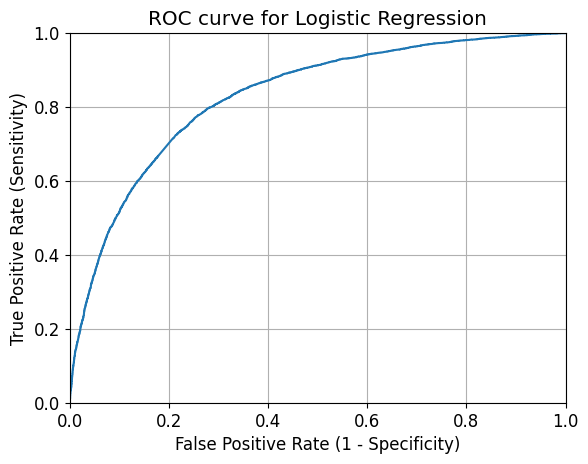

In [58]:
y_pred_prob = clf.predict_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [59]:
print(sklearn.metrics.roc_auc_score(y_test, y_pred_prob))

0.8286908650000001


In [60]:
from sklearn.linear_model import LogisticRegressionCV

In [61]:
lrcv = LogisticRegressionCV(random_state=42, verbose=2, n_jobs = -1, solver = 'saga', max_iter=500)
lrcv.fit(X_train_new, y_train)

rescaling...rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


rescaling...rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds
max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds
max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 12 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 12 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 12 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 14 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 13 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 12 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   56.6s remaining:   37.7s


max_iter reached after 12 seconds
max_iter reached after 12 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.8s finished


max_iter reached after 6 seconds


c:\Users\Josiah Lee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegressionCV(max_iter=500, n_jobs=-1, random_state=42, solver='saga',
                     verbose=2)

In [62]:
lrcv.scores_

{1: array([[0.66275  , 0.694625 , 0.7285625, 0.7521875, 0.7678125, 0.7816875,
         0.7834375, 0.7833125, 0.7835625, 0.784    ],
        [0.665125 , 0.69575  , 0.7358125, 0.7570625, 0.774625 , 0.7839375,
         0.7841875, 0.7835   , 0.784    , 0.7839375],
        [0.667625 , 0.7000625, 0.738    , 0.7616875, 0.7790625, 0.7871875,
         0.7884375, 0.7884375, 0.788125 , 0.787875 ],
        [0.6669375, 0.6954375, 0.731125 , 0.756625 , 0.7744375, 0.78375  ,
         0.7859375, 0.786375 , 0.7863125, 0.78625  ],
        [0.6625625, 0.693125 , 0.728375 , 0.7535625, 0.7705625, 0.7805625,
         0.7855625, 0.785125 , 0.78525  , 0.7855625]])}

In [63]:
y_pred = lrcv.predict(X_test_new)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7393
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     10000
           1       0.72      0.77      0.75     10000

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



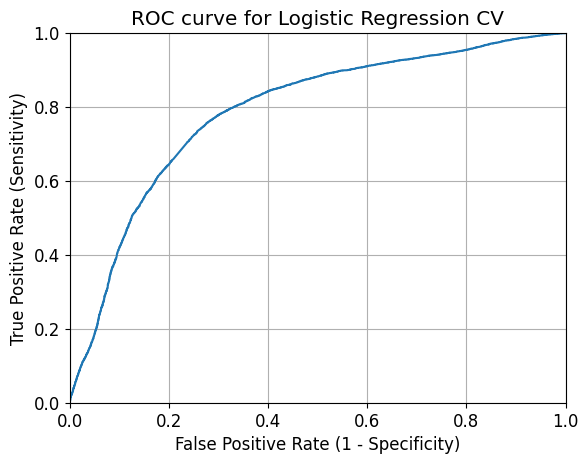

In [64]:
y_pred_prob = lrcv.predict_proba(X_test_new)[:, 1]

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression CV')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [65]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.787261325
